In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/Chatbot"

/content/drive/MyDrive/Chatbot


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime

In [4]:
tech_list = ['AAPL', 'GOOG', 'NFLX', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [5]:
company_list = [AAPL, GOOG, NFLX, AMZN]
company_name = ["APPLE", "GOOGLE", "NETFLIX", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.value_counts()

High         Low          Open         Close        Volume       Adj Close    company_name
3552.250000  3486.689941  3547.000000  3531.449951  3931500.0    3531.449951  AMAZON          1
472.359985   454.000000   468.540009   457.850006   4826200.0    457.850006   NETFLIX         1
486.299988   475.000000   478.869995   484.119995   4408200.0    484.119995   NETFLIX         1
486.239990   479.100006   484.190002   482.350006   2423500.0    482.350006   NETFLIX         1
485.579987   477.299988   480.000000   479.100006   3953600.0    479.100006   NETFLIX         1
                                                                                             ..
1660.770020  1616.030029  1628.160034  1626.030029  2535400.0    1626.030029  GOOGLE          1
1659.219971  1603.599976  1608.000000  1652.380005  3993400.0    1652.380005  GOOGLE          1
1655.000000  1625.750000  1653.680054  1634.329956  1861600.0    1634.329956  GOOGLE          1
1647.964966  1630.310059  1647.890015  1634.1

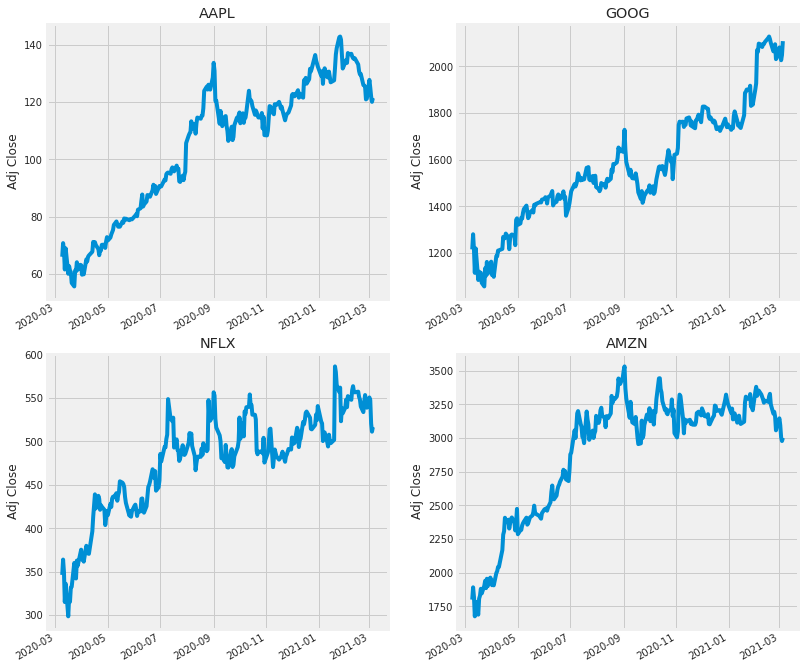

In [6]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

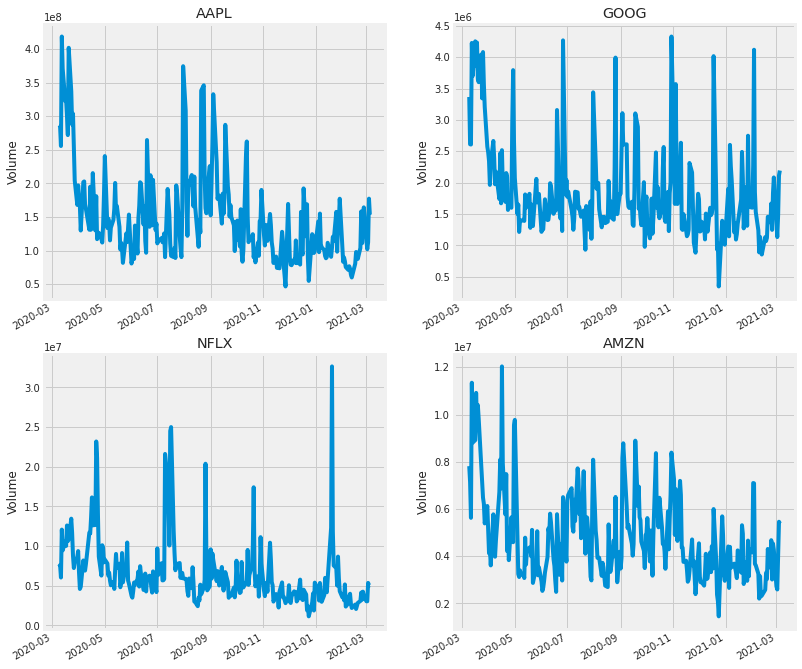

In [7]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

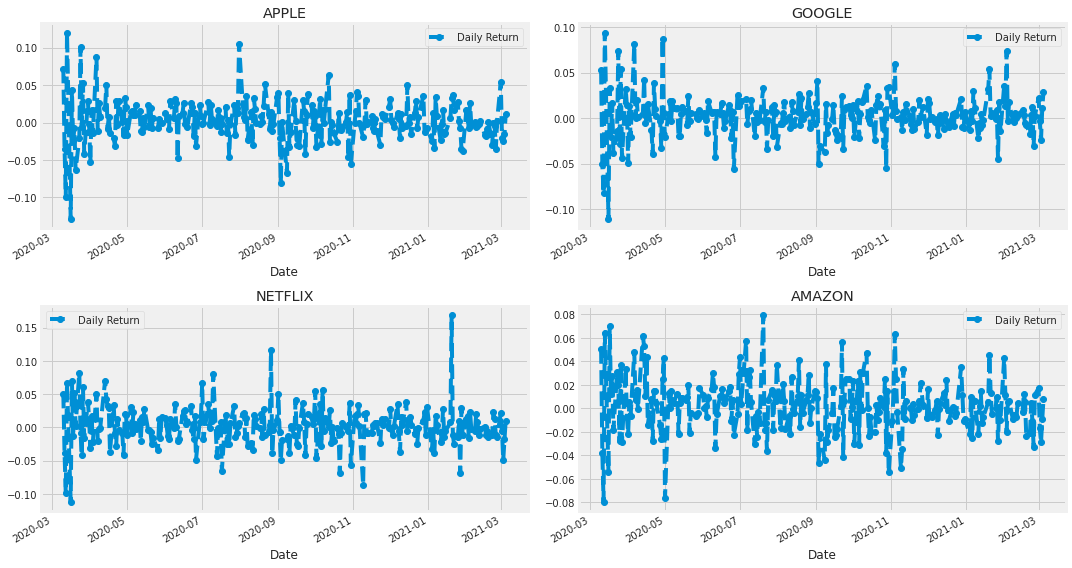

In [8]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
NFLX['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NETFLIX')
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()

In [9]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,AAPL,GOOG,NFLX,AMZN
Date,,,,
2020-03-09,66.030655,1215.560059,346.489990,1800.609985
2020-03-10,70.786301,1280.390015,364.130005,1891.819946
2020-03-11,68.327858,1215.410034,349.920013,1820.859985
2020-03-12,61.580158,1114.910034,315.250000,1676.609985
2020-03-13,68.957970,1219.729980,336.299988,1785.000000


In [10]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,NFLX,AMZN
Date,,,,
2020-03-09,NaN,NaN,NaN,NaN
2020-03-10,0.072022,0.053333,0.050911,0.050655
2020-03-11,-0.034730,-0.050750,-0.039025,-0.037509
2020-03-12,-0.098755,-0.082688,-0.099080,-0.079221
2020-03-13,0.119808,0.094017,0.066772,0.064648


In [11]:
df = DataReader('AMZN', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2021-03-01,3149.560059,3097.989990,3127.889893,3146.139893,2729100,3146.139893
2021-03-02,3163.520020,3087.120117,3143.469971,3094.530029,2590000,3094.530029
2021-03-03,3107.780029,2995.000000,3081.179932,3005.000000,3967200,3005.000000


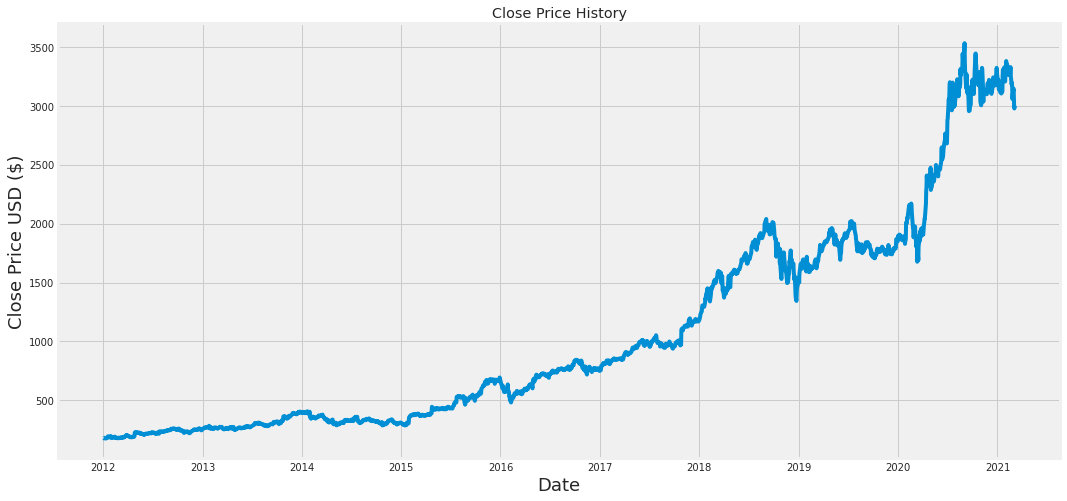

In [12]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [13]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2193

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[9.23852679e-04],
       [4.70866468e-04],
       [5.00669928e-04],
       ...,
       [8.43109277e-01],
       [8.34934708e-01],
       [8.41756271e-01]])

In [15]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00447025, 0.00302785, 0.00329904,
       0.00353746, 0.00518251, 0.00579344, 0.00483383, 0.00551629,
       0.001052  , 0.00172552, 0.00350169, 0.0021487 , 0.00246162,
       0.00284606, 0.00269705, 0.00286394, 0.00466694, 0.00458052,
       0.00254506, 0.00119207, 0.00195797, 0.00188644, 0.00138578,
       0.00088213, 0.00095366, 0.00077484, 0.00234539, 0.00112054,
       0.00122485, 0.00100432, 0.00129041, 0.00153777, 0.00233645,
       0.00348977, 0.00250036, 0.0022232 , 0.00258082, 0.00188644,
       0.00253314, 0.00271791, 0.00285798, 0.00488747, 0.00470866,
       0.00490833, 0.00569509, 0.00802856, 0.00879447, 0.00751896])]
[0.00854711290330825]

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2133/2133 [==============================] - 20s 7ms/step - loss: 0.0024


In [17]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

81.377801810201

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


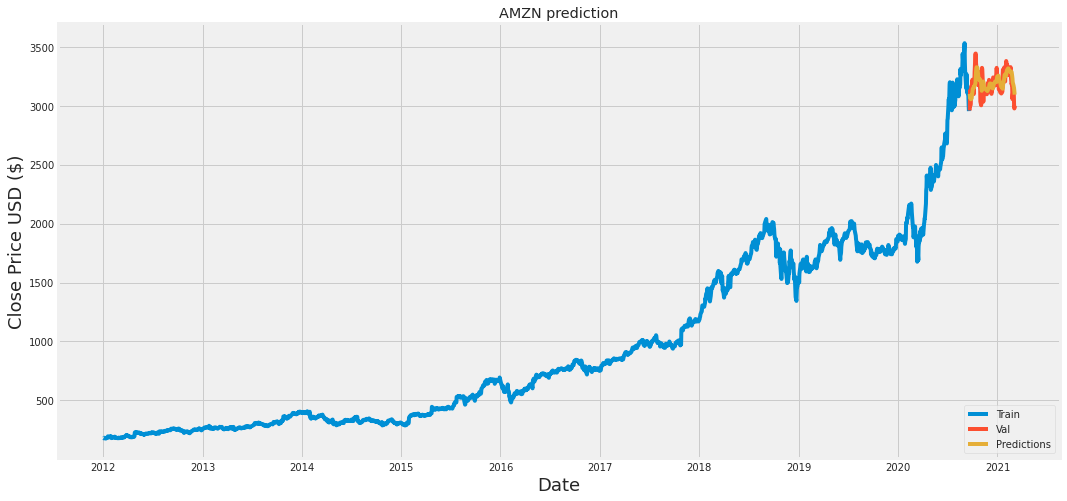

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('AMZN prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('AMZN prediction.png')
plt.show()